In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Загрузка данных
df = pd.read_csv('D:/ТМО/googleplaystore.csv')

In [3]:
# Вывод первых 5 строк данных
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Размер набора данных
df.shape

(10841, 13)

In [5]:
# Подсчет пропущенных значений в каждом столбце
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Список столбцов
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# Функция для вывода уникальных значений в столбце
def print_unique(data, column, **kwargs):
    result = data[column].dropna().unique()
    try:
        kwargs['key']
    except:
        kwargs['key'] = None

    if kwargs['key']:
        result = sorted(result, key=kwargs['key'])
    else:
        result = sorted(result)
    print(f'Column: \'{column}\';\nUnique values: {result if len(result) < 68 else "[...]"};\nCount: {len(result)}')

In [8]:
# Вывод уникальных значений в столбце 'Rating'
print_unique(df, 'Rating')

Column: 'Rating';
Unique values: [1.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 19.0];
Count: 40


In [9]:
# Импутация пропущенных значений в столбце 'Rating' с использованием константы
R_df = df[['Rating']]
R_df_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)
R_df = R_df_imputer.fit_transform(R_df)
R_df

array([[4.1],
       [3.9],
       [4.7],
       ...,
       [0. ],
       [4.5],
       [4.5]])

In [10]:
# Замена столбца 'Rating' на импутированные значения
df[['Rating']] = R_df

In [11]:
# Удаление строк с пропущенными значениями в столбцах 'Type', 'Content Rating', 'Current Ver', 'Android Ver'
df = df.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [12]:
# Подсчет пропущенных значений после удаления
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
# Инициализация LabelEncoder для кодирования категориальных столбцов
labenc = LabelEncoder()

In [14]:
# Кодирование категориальных столбцов
df['App_c'] = labenc.fit_transform(df['App'])
df['Category_c'] = labenc.fit_transform(df['Category'])
df['Type_c'] = labenc.fit_transform(df['Type'])
df['Content Rating_c'] = labenc.fit_transform(df['Content Rating'])
df['Genres_c'] = labenc.fit_transform(df['Genres'])
df['Current Ver_c'] = labenc.fit_transform(df['Current Ver'])
df['Android Ver_c'] = labenc.fit_transform(df['Android Ver'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App_c,Category_c,Type_c,Content Rating_c,Genres_c,Current Ver_c,Android Ver_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,6955,0,0,1,9,118,15
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2630,0,0,1,12,1018,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8648,0,0,1,9,464,15
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,7819,0,0,4,9,2764,18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,7014,0,0,1,11,277,20


In [15]:
# Инициализация MinMaxScaler для масштабирования столбцов
mms = MinMaxScaler()

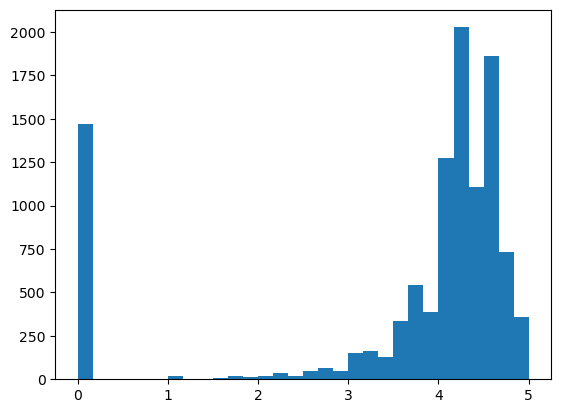

In [16]:
# Гистограмма распределения столбца 'Rating'
plt.hist(df['Rating'], 30)
plt.show()

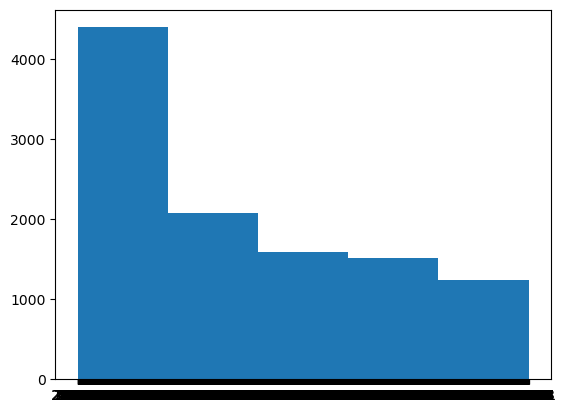

In [17]:
# Гистограмма распределения столбца 'Reviews'
plt.hist(df['Reviews'], 5)
plt.show()

In [18]:
# Масштабирование столбцов 'Rating' и 'Reviews' с использованием MinMaxScaler
rat_scaled = mms.fit_transform(df[['Rating']])
rev_scaled = mms.fit_transform(df[['Reviews']])
df['Rating_m'] = rat_scaled
df['Reviews_m'] = rev_scaled

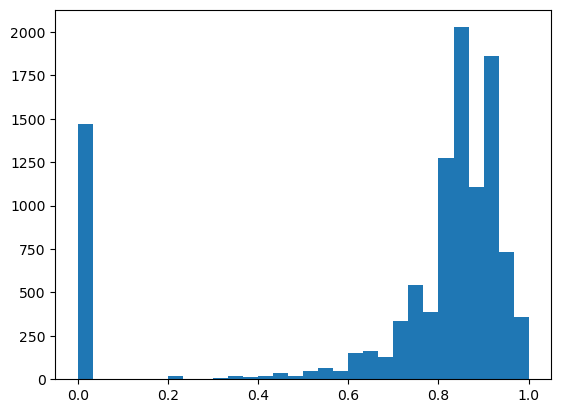

In [19]:
# Гистограмма масштабированного столбца 'Rating'
plt.hist(df['Rating_m'], 30)
plt.show()

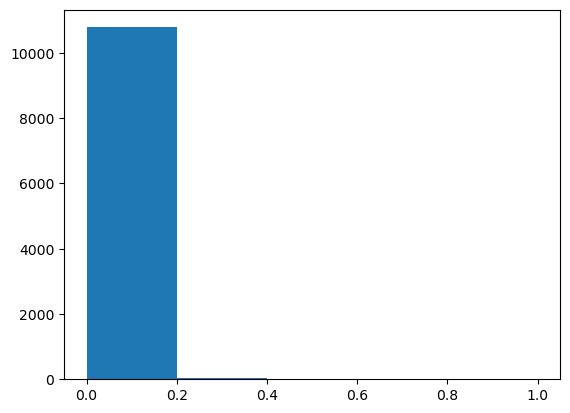

In [20]:
# Гистограмма масштабированного столбца 'Reviews'
plt.hist(df['Reviews_m'], 5)
plt.show()

In [21]:
# Вывод первых 10 строк данных после всех преобразований
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,App_c,Category_c,Type_c,Content Rating_c,Genres_c,Current Ver_c,Android Ver_c,Rating_m,Reviews_m
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,6955,0,0,1,9,118,15,0.82,0.000002
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,2630,0,0,1,12,1018,15,0.78,0.000012
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,8648,0,0,1,9,464,15,0.94,0.001120
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,4.2 and up,7819,0,0,4,9,2764,18,0.90,0.002759
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,7014,0,0,1,11,277,20,0.86,0.000012
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,...,2.3 and up,6871,0,0,1,9,113,8,0.88,0.000002
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,7872,0,0,1,9,277,15,0.76,0.000002
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,...,4.2 and up,5374,0,0,1,9,2390,18,0.82,0.000471
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,...,3.0 and up,4800,0,0,1,9,1455,10,0.88,0.000176
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,...,4.0.3 and up,5587,0,0,1,11,1429,15,0.94,0.000002
